In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import math
from sklearn.model_selection import train_test_split,  GridSearchCV



In [307]:
data = pd.read_csv("dataset2.csv")
data.columns

Index(['ag+1:629e', 'feeling.nervous', 'panic', 'breathing.rapidly',
       'sweating', 'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'introvert',
       'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'hallucinations',
       'repetitive.behaviour', 'seasonally', 'increased.energy', 'Disorder'],
      dtype='object')

In [308]:
data.head(5)

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [309]:
data = data.rename(columns={'ag+1:629e':'age'})
data.loc[data['Disorder'] == "anexiety", 'Disorder'] = "Anxiety"
data.loc[data['Disorder'] == "psychotic deprission", 'Disorder'] = "psychotic depression"

In [310]:
Disorder_data = data["Disorder"].unique()
Disorder_data

array(['MDD', 'ASD', 'Loneliness', 'bipolar', 'Anxiety', 'PTSD',
       'sleeping disorder', 'psychotic depression', 'eating disorder',
       'ADHD', 'PDD', 'OCD'], dtype=object)

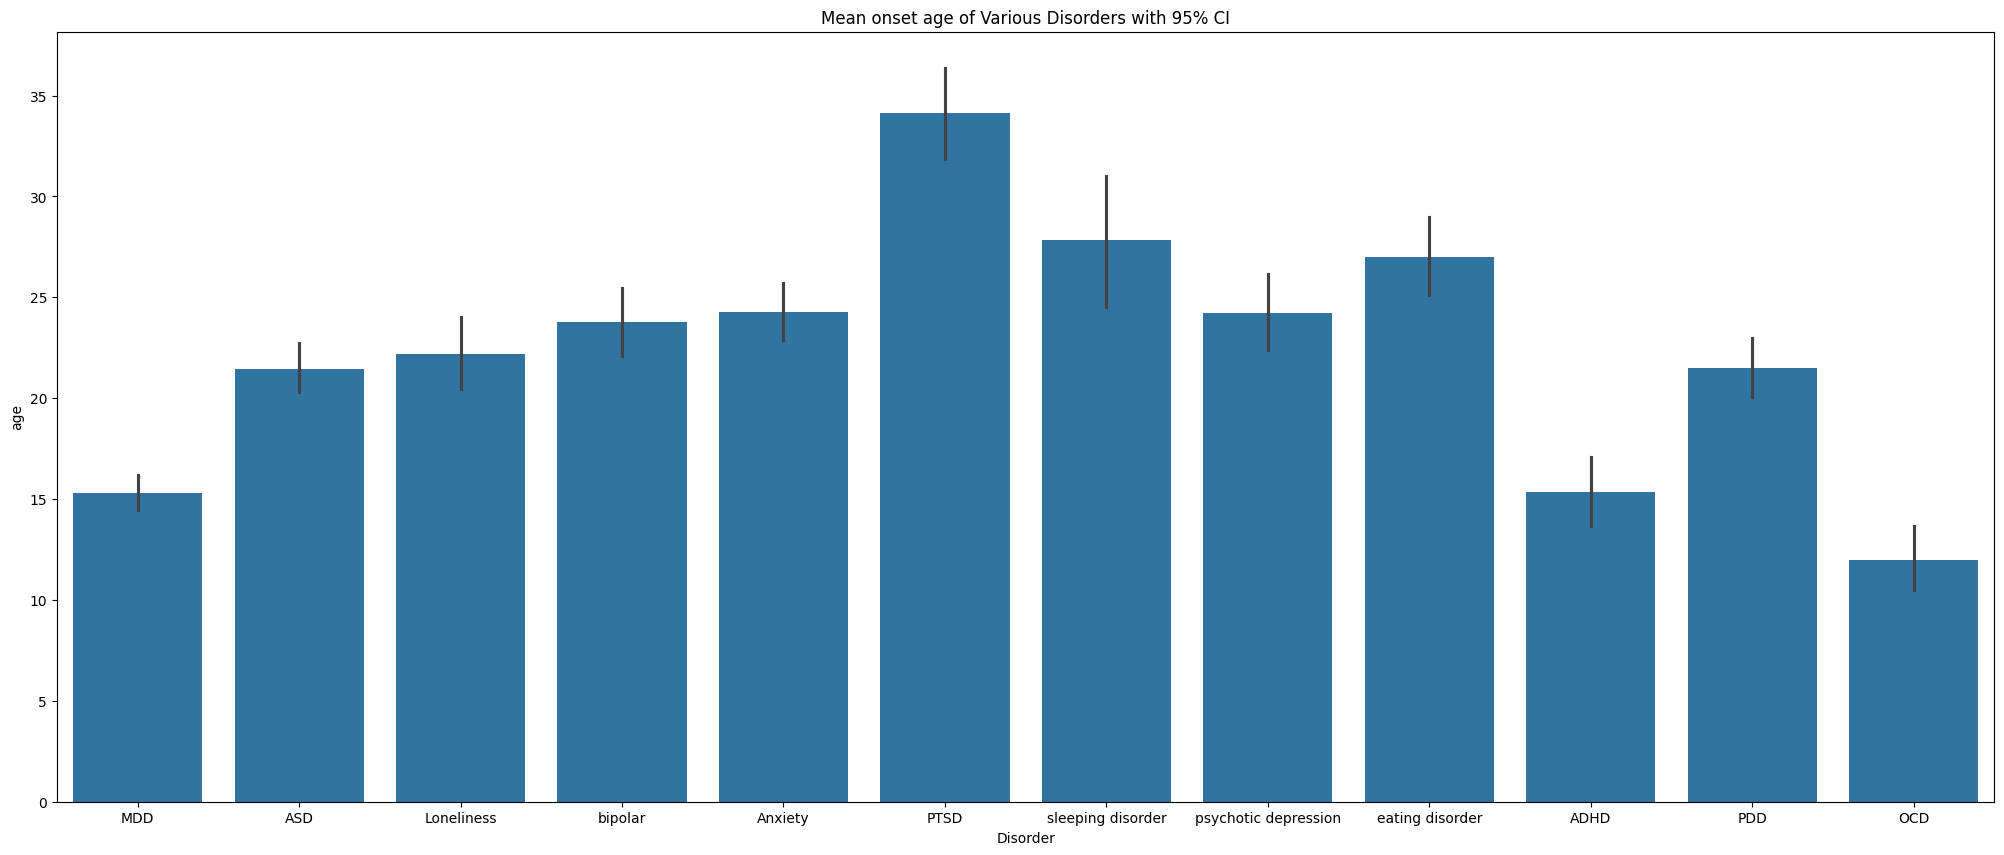

In [311]:
plt.figure(figsize=(25,10))
sns.barplot(data = data, x='Disorder', y='age', estimator=np.mean).set_title('Mean onset age of Various Disorders with 95% CI')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

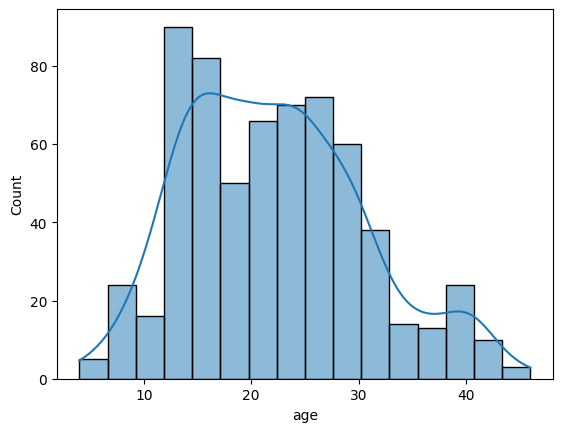

In [312]:
sns.histplot(data.age, kde=True)

<Axes: title={'center': 'Incidences of Various Mental Health Symptoms'}>

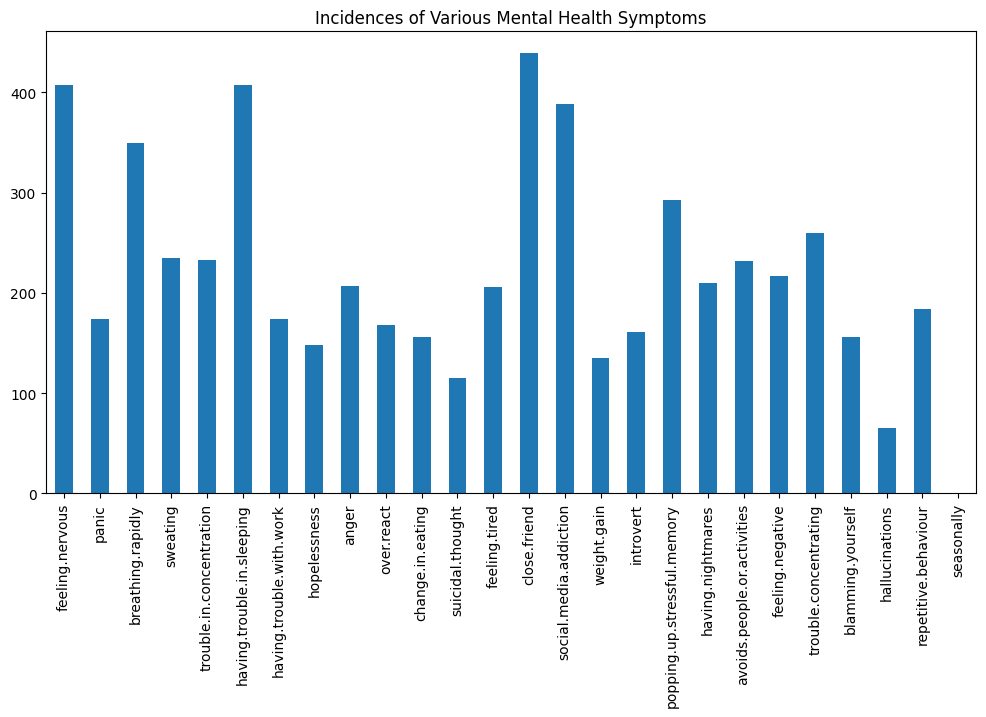

In [313]:
symptom_incidences = data[data.columns[1:27]].sum()
symptom_incidences.plot.bar(figsize=(12,6), title = 'Incidences of Various Mental Health Symptoms')

<Axes: xlabel='Disorder'>

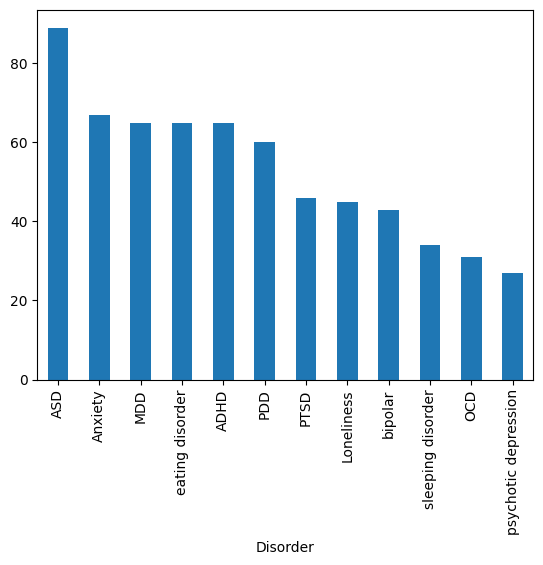

In [314]:
check_disorder = data['Disorder'].value_counts()
check_disorder.plot.bar()

In [315]:
for label in Disorder_data:
    if label == "OCD":
        data.loc[data['Disorder'] == label, 'Disorder'] = "OCD"
    else:
        data.loc[data['Disorder'] == label, 'Disorder'] = "Not OCD"

<Axes: xlabel='Disorder'>

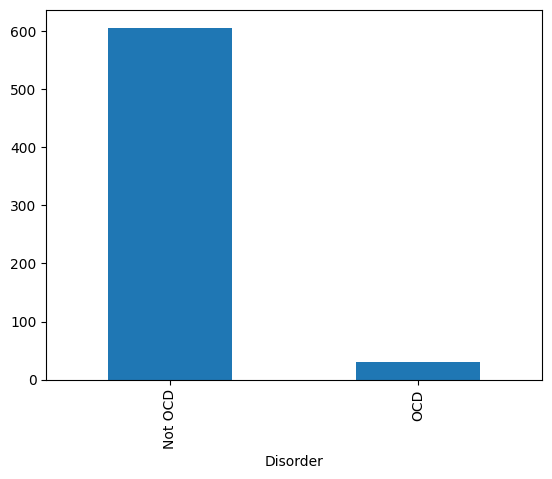

In [316]:
check_disorder = data['Disorder'].value_counts()
check_disorder.plot.bar()

<Axes: title={'center': 'Incidences of Various Mental Health Symptoms'}>

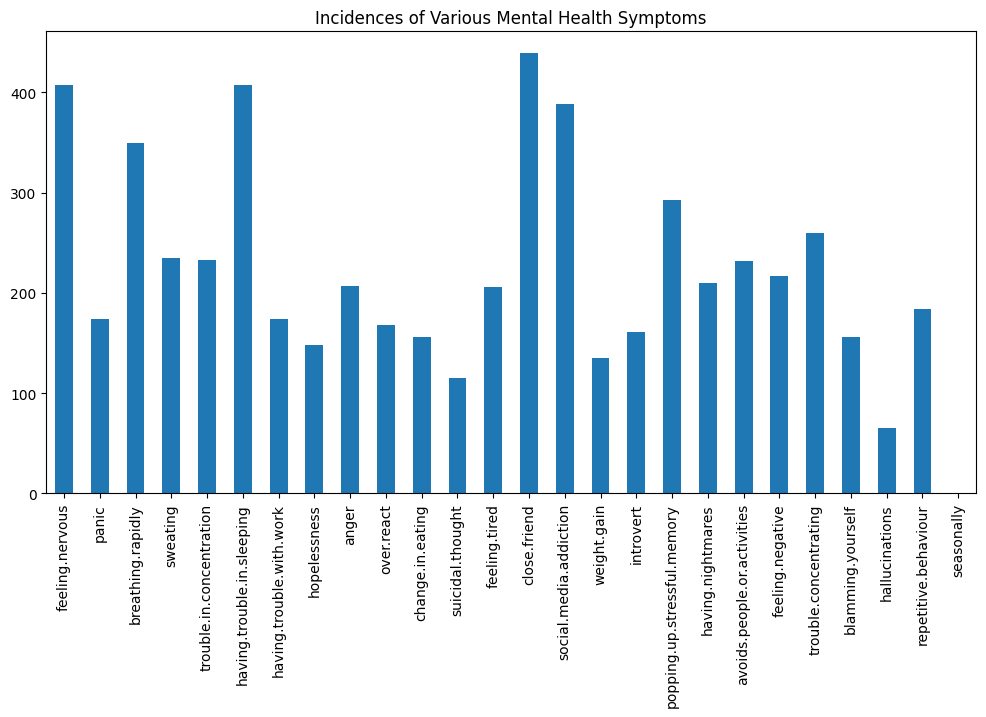

In [317]:
symptom_incidences = data[data.columns[1:27]].sum()
symptom_incidences.plot.bar(figsize=(12,6), title = 'Incidences of Various Mental Health Symptoms')

In [318]:
for i in data.columns:
    print(f'{i}. {data[i].unique()}')

age. [23 14 25 29 32 40 18 24 37  4 27 15 19 12 21 35 26 28 17 31 20 16 43 42
  7 13  9 30 36 11 41 46 10]
feeling.nervous. [1 0]
panic. [0 1]
breathing.rapidly. [1 0]
sweating. [0 1]
trouble.in.concentration. [0 1]
having.trouble.in.sleeping. [1 0]
having.trouble.with.work. [0 1]
hopelessness. [1 0]
anger. [0 1]
over.react. [0 1]
change.in.eating. [0 1]
suicidal.thought. [1 0]
feeling.tired. [0 1]
close.friend. [1 0]
social.media.addiction. [0 1]
weight.gain. [0 1]
introvert. [0 1]
popping.up.stressful.memory. [1 0]
having.nightmares. [0 1]
avoids.people.or.activities. [0 1]
feeling.negative. [1 0]
trouble.concentrating. [0 1]
blamming.yourself. [0 1]
hallucinations. [0 1]
repetitive.behaviour. [0 1]
seasonally. [0]
increased.energy. [0 1]
Disorder. ['Not OCD' 'OCD']


In [319]:
data = data.drop(['seasonally'],axis=1)

In [320]:
X = data.drop(['Disorder'], axis=1)
y = data.drop([word for word in data.columns if word != "Disorder"], axis=1)

In [321]:
len(data)

637

In [322]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=120)

In [323]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

>1, train: 0.951, test: 0.953
>2, train: 0.949, test: 0.961
>3, train: 0.953, test: 0.945
>4, train: 0.951, test: 0.953
>5, train: 0.949, test: 0.961
>6, train: 0.953, test: 0.945
>7, train: 0.955, test: 0.938
>8, train: 0.957, test: 0.930
>9, train: 0.949, test: 0.961


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConve

>10, train: 0.949, test: 0.961
>11, train: 0.947, test: 0.969
>12, train: 0.953, test: 0.945
>13, train: 0.951, test: 0.953
>14, train: 0.955, test: 0.938
>15, train: 0.953, test: 0.945
>16, train: 0.953, test: 0.945
>17, train: 0.953, test: 0.945
>18, train: 0.945, test: 0.977
>19, train: 0.949, test: 0.961
>20, train: 0.949, test: 0.961
>21, train: 0.949, test: 0.961
>22, train: 0.953, test: 0.945
>23, train: 0.951, test: 0.953
>24, train: 0.951, test: 0.953
>25, train: 0.951, test: 0.953


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConve

>26, train: 0.953, test: 0.945
>27, train: 0.947, test: 0.969
>28, train: 0.959, test: 0.922
>29, train: 0.955, test: 0.938
>30, train: 0.951, test: 0.953
>31, train: 0.947, test: 0.969
>32, train: 0.955, test: 0.938
>33, train: 0.951, test: 0.953
>34, train: 0.953, test: 0.945
>35, train: 0.959, test: 0.922
>36, train: 0.957, test: 0.930
>37, train: 0.953, test: 0.945
>38, train: 0.955, test: 0.938
>39, train: 0.955, test: 0.938
>40, train: 0.949, test: 0.961
>41, train: 0.951, test: 0.953
>42, train: 0.951, test: 0.953
>43, train: 0.951, test: 0.953
>44, train: 0.959, test: 0.922
>45, train: 0.947, test: 0.969
>46, train: 0.949, test: 0.961
>47, train: 0.957, test: 0.930
>48, train: 0.953, test: 0.945
>49, train: 0.951, test: 0.953
>50, train: 0.949, test: 0.961
>51, train: 0.955, test: 0.938
>52, train: 0.951, test: 0.953


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConve

>53, train: 0.957, test: 0.930
>54, train: 0.947, test: 0.969
>55, train: 0.953, test: 0.945
>56, train: 0.957, test: 0.930
>57, train: 0.953, test: 0.945
>58, train: 0.945, test: 0.977
>59, train: 0.953, test: 0.945
>60, train: 0.947, test: 0.969
>61, train: 0.951, test: 0.953
>62, train: 0.951, test: 0.953
>63, train: 0.955, test: 0.938
>64, train: 0.957, test: 0.930
>65, train: 0.949, test: 0.961
>66, train: 0.951, test: 0.953
>67, train: 0.945, test: 0.977
>68, train: 0.951, test: 0.953
>69, train: 0.949, test: 0.961
>70, train: 0.947, test: 0.969
>71, train: 0.949, test: 0.961
>72, train: 0.949, test: 0.961


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConve

>73, train: 0.947, test: 0.969
>74, train: 0.949, test: 0.961
>75, train: 0.949, test: 0.961
>76, train: 0.959, test: 0.922
>77, train: 0.949, test: 0.961
>78, train: 0.961, test: 0.914
>79, train: 0.959, test: 0.922
>80, train: 0.947, test: 0.969
>81, train: 0.949, test: 0.961
>82, train: 0.945, test: 0.977
>83, train: 0.947, test: 0.969
>84, train: 0.953, test: 0.945
>85, train: 0.951, test: 0.953
>86, train: 0.955, test: 0.938
>87, train: 0.953, test: 0.945
>88, train: 0.955, test: 0.938
>89, train: 0.953, test: 0.945
>90, train: 0.947, test: 0.969
>91, train: 0.949, test: 0.961
>92, train: 0.953, test: 0.945
>93, train: 0.951, test: 0.953


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConve

>94, train: 0.947, test: 0.969
>95, train: 0.955, test: 0.938
>96, train: 0.951, test: 0.953
>97, train: 0.957, test: 0.930
>98, train: 0.957, test: 0.930
>99, train: 0.959, test: 0.922
>100, train: 0.953, test: 0.945
>101, train: 0.959, test: 0.922
>102, train: 0.947, test: 0.969
>103, train: 0.947, test: 0.969
>104, train: 0.949, test: 0.961
>105, train: 0.953, test: 0.945
>106, train: 0.951, test: 0.953
>107, train: 0.953, test: 0.945
>108, train: 0.945, test: 0.977
>109, train: 0.955, test: 0.938
>110, train: 0.953, test: 0.945
>111, train: 0.949, test: 0.961
>112, train: 0.959, test: 0.922
>113, train: 0.953, test: 0.945
>114, train: 0.953, test: 0.945
>115, train: 0.943, test: 0.984


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConve

>116, train: 0.949, test: 0.961
>117, train: 0.945, test: 0.977
>118, train: 0.953, test: 0.945
>119, train: 0.953, test: 0.945
>120, train: 0.951, test: 0.953
>121, train: 0.943, test: 0.984
>122, train: 0.963, test: 0.906
>123, train: 0.953, test: 0.945
>124, train: 0.945, test: 0.977
>125, train: 0.949, test: 0.961
>126, train: 0.947, test: 0.969
>127, train: 0.957, test: 0.930
>128, train: 0.947, test: 0.969
>129, train: 0.951, test: 0.953
>130, train: 0.957, test: 0.930
>131, train: 0.947, test: 0.969
>132, train: 0.961, test: 0.914
>133, train: 0.955, test: 0.938
>134, train: 0.947, test: 0.969
>135, train: 0.951, test: 0.953
>136, train: 0.949, test: 0.961


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConve

>137, train: 0.947, test: 0.969
>138, train: 0.949, test: 0.961
>139, train: 0.955, test: 0.938
>140, train: 0.953, test: 0.945
>141, train: 0.959, test: 0.922
>142, train: 0.943, test: 0.984
>143, train: 0.951, test: 0.953
>144, train: 0.955, test: 0.938
>145, train: 0.947, test: 0.969
>146, train: 0.951, test: 0.953
>147, train: 0.953, test: 0.945
>148, train: 0.959, test: 0.922
>149, train: 0.953, test: 0.945


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConve

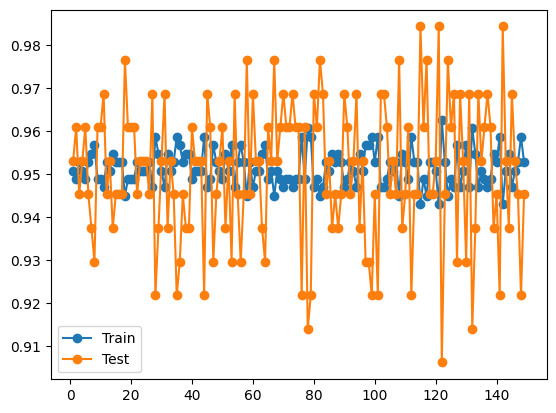

In [324]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 150)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=i)
 model = SVC()
 # fit model on the training dataset
 model.fit(x_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(x_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(x_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [325]:
data

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,Not OCD
1,14,1,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,Not OCD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Not OCD
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,1,Not OCD
4,32,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,Not OCD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,23,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Not OCD
633,27,1,0,1,0,0,0,0,1,1,...,1,1,0,1,1,1,0,0,0,Not OCD
634,19,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,Not OCD
635,16,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Not OCD


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider

>1, train: 0.767, test: 0.700
>2, train: 0.777, test: 0.712
>3, train: 0.782, test: 0.716
>4, train: 0.782, test: 0.724
>5, train: 0.840, test: 0.819
>6, train: 0.894, test: 0.868
>7, train: 0.866, test: 0.798
>8, train: 0.821, test: 0.774
>9, train: 0.846, test: 0.815
>10, train: 0.874, test: 0.848
>11, train: 0.936, test: 0.938
>12, train: 0.934, test: 0.938
>13, train: 0.774, test: 0.807
>14, train: 0.763, test: 0.794
>15, train: 0.754, test: 0.778
>16, train: 0.712, test: 0.757
>17, train: 0.679, test: 0.716
>18, train: 0.678, test: 0.737
>19, train: 0.529, test: 0.593
>20, train: 0.703, test: 0.749
>21, train: 0.674, test: 0.712
>22, train: 0.712, test: 0.757
>23, train: 0.672, test: 0.708
>24, train: 0.521, test: 0.576
>25, train: 0.688, test: 0.695
>26, train: 1.000, test: 1.000
>27, train: 0.539, test: 0.588
>28, train: 0.723, test: 0.749
>29, train: 0.705, test: 0.716
>30, train: 0.549, test: 0.593
>31, train: 0.728, test: 0.765
>32, train: 0.543, test: 0.584


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=21).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=22).  Consid

>33, train: 0.684, test: 0.687
>34, train: 0.327, test: 0.416
>35, train: 0.370, test: 0.457
>36, train: 0.484, test: 0.523
>37, train: 0.499, test: 0.527
>38, train: 0.498, test: 0.523
>39, train: 1.000, test: 1.000
>40, train: 0.997, test: 1.000
>41, train: 0.961, test: 0.951
>42, train: 0.994, test: 0.992
>43, train: 0.943, test: 0.930
>44, train: 0.921, test: 0.893
>45, train: 0.949, test: 0.938
>46, train: 0.924, test: 0.901
>47, train: 0.921, test: 0.893
>48, train: 0.924, test: 0.901
>49, train: 0.935, test: 0.914


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=46).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=47).  Consid

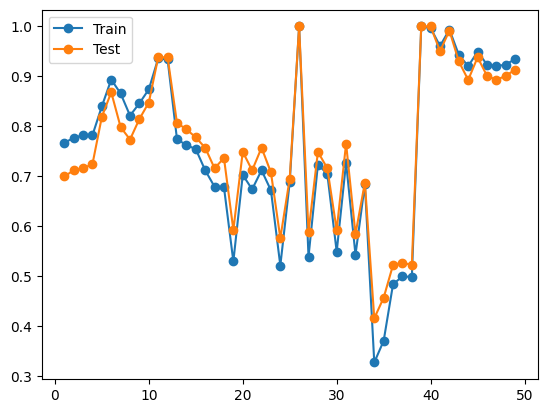

In [326]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 50)]
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.8, random_state=42)
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = SVC(max_iter=i)
 # fit model on the training dataset
 model.fit(x_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(x_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(x_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [327]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [328]:
%%capture
#gather features
features = "+".join(data.columns - ["Disorder"])

# get y and X dataframes based on this regression:
y, X = dmatrices('Disorder ~' + features, data, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

TypeError: Cannot broadcast np.ndarray with operand of type <class 'list'>

In [329]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [330]:
vif.round(1)

,VIF Factor,features
0,15.4,age
1,19.0,feeling.nervous
2,26.4,panic
3,66.1,breathing.rapidly
4,23.2,sweating
5,15.0,trouble.in.concentration
6,27.6,having.trouble.in.sleeping
7,6.0,having.trouble.with.work
8,49.6,hopelessness
9,118.7,anger


In [331]:
data = data.drop(['feeling.negative', 'having.nightmares','anger','breathing.rapidly','suicidal.thought'],axis=1)

In [332]:
%%capture
#gather features
features = "+".join(data.columns - ["Disorder"])

# get y and X dataframes based on this regression:
y, X = dmatrices('Disorder ~' + features, data, return_type='dataframe')



TypeError: Cannot broadcast np.ndarray with operand of type <class 'list'>

In [333]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,15.4,age
1,19.0,feeling.nervous
2,26.4,panic
3,66.1,breathing.rapidly
4,23.2,sweating
5,15.0,trouble.in.concentration
6,27.6,having.trouble.in.sleeping
7,6.0,having.trouble.with.work
8,49.6,hopelessness
9,118.7,anger


In [334]:

# model1 = SVC(kernel='rbf', C=1, gamma='scale')
# model1.fit(x_train,y_train)
# y_pred = model1.predict(x_test)
# print(accuracy_score(y_pred,y_test))
# print(classification_report(y_pred,y_test))

In [335]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [336]:
# from imblearn.under_sampling import RandomUnderSampler

# # Instantiate RandomUnderSampler
# undersampler = RandomUnderSampler(random_state=42)

# # Resample the dataset
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [337]:
y_resampled.value_counts()

Disorder
Not OCD     606
OCD         606
Name: count, dtype: int64

<Axes: xlabel='Disorder'>

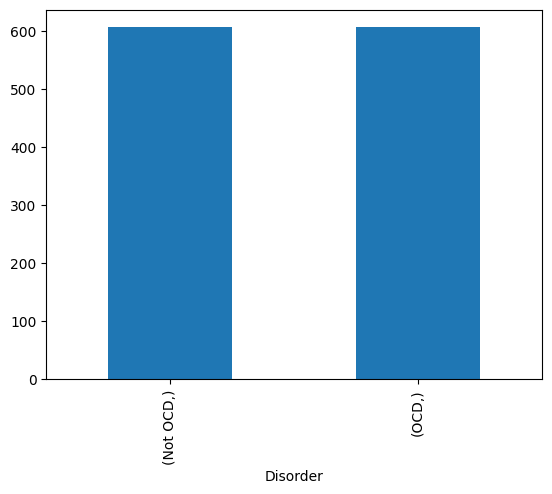

In [338]:
check_disorder = y_resampled.value_counts()
check_disorder.plot.bar()

In [339]:
temp = pd.DataFrame()
temp[X_resampled.columns] = X_resampled
temp[y_resampled.columns] = y_resampled

In [340]:
temp = temp.sample(frac = 1)

In [341]:
X_resampled = temp.drop(['Disorder'],axis=1)
y_resampled = temp['Disorder']

In [342]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.5)

In [356]:
model1 = SVC()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.966996699669967
              precision    recall  f1-score   support

     Not OCD       0.99      0.95      0.97       322
         OCD       0.94      0.99      0.97       284

    accuracy                           0.97       606
   macro avg       0.97      0.97      0.97       606
weighted avg       0.97      0.97      0.97       606



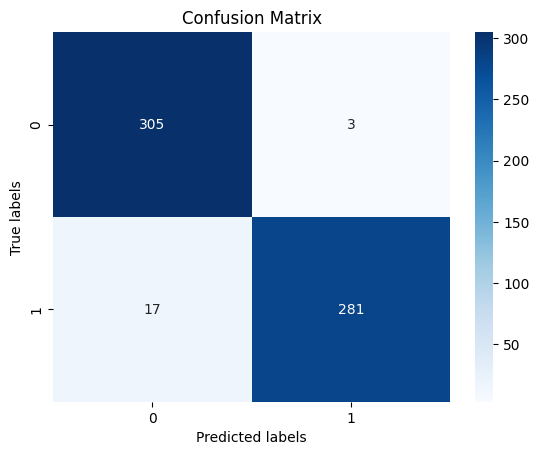

In [357]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [345]:
model2 = BernoulliNB()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9752475247524752
              precision    recall  f1-score   support

     Not OCD       1.00      0.95      0.98       323
         OCD       0.95      1.00      0.97       283

    accuracy                           0.98       606
   macro avg       0.97      0.98      0.98       606
weighted avg       0.98      0.98      0.98       606



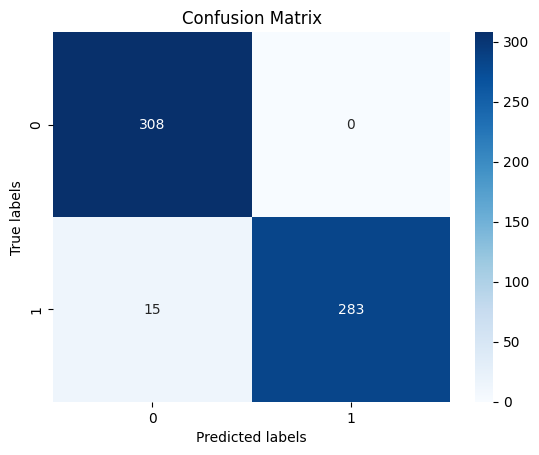

In [346]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [347]:
data['Disorder'].value_counts()

Disorder
Not OCD    606
OCD         31
Name: count, dtype: int64

In [348]:
from sklearn.metrics import roc_auc_score, roc_curve

In [358]:
y_preds = []
for i in y_pred:
    if i == 'OCD':
        y_preds.append(1)
    else:
        y_preds.append(0)


In [359]:
y_tests = []
for i in y_test:
    if i == 'OCD':
        y_tests.append(1)
    else:
        y_tests.append(0)

In [360]:
fpr, tpr , treshold = roc_curve(y_tests, y_preds)
roc_auc = roc_auc_score(y_tests,y_preds)
print(fpr," ",tpr," ",treshold)

[0.         0.00974026 1.        ]   [0.         0.94295302 1.        ]   [inf  1.  0.]


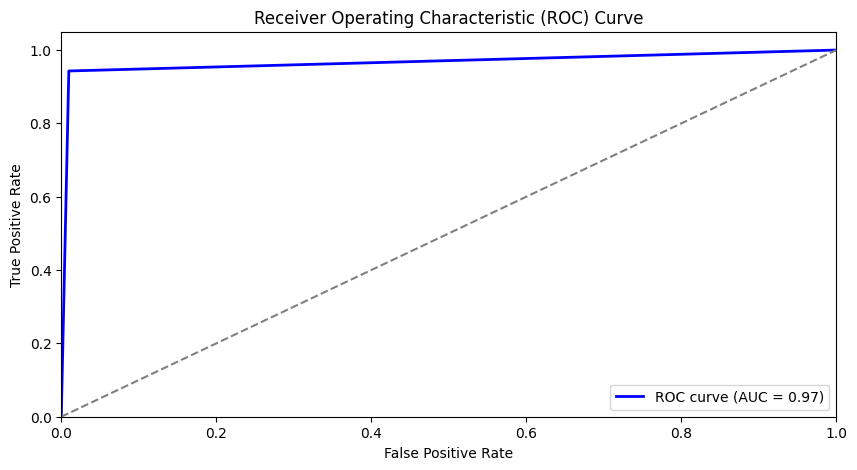

In [361]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()